# Single Parent Population
## sixth Try
### 99/09/25

Still looking for critical exponent. Now for a new distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Geometric distribution for number of offsprings


In [2]:
#Poisson distribution assumption

def geometric_next_gen(n, lam):
    n_next  = 0
    inf_num = 0

    for i in range(n):
        inf_num = int(np.random.geometric(lam, 1))
        n_next += inf_num
        #need to assume logic range
#         if inf_num < 10:
#             n_next +=inf_num
    return n_next

In [101]:
geometric_next_gen(1, 1)

1

Wall time: 43.6 ms


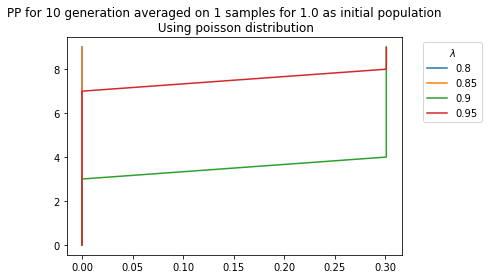

In [20]:
%%time

lam_mat = np.arange(0.8, 1, 0.05)

 

for lam in lam_mat:
    generation   = 10
    time    = np.arange(generation)
    pop     = np.zeros(generation)
    pop[0]  = 10
    pop_std = np.zeros(generation)

    ave = 1
    ns = np.zeros(ave)


    for t in range((generation-1)):
        for i in range(ave):
            ns[i] = geometric_next_gen(int(pop[t]), lam)
        pop[t+1]     = np.mean(ns)
        pop_std[t+1] = np.std(ns) 

    plt.plot(np.log10(pop), time, label = f'{np.round(lam, 3)}')
    plt.title("PP for {} generation averaged on {} samples for {} as initial population \
    \n Using poisson distribution".format(generation, ave, pop[0]))
    
#     plt.plot(pop_std, time, label = f'std for $\lambda$ = {lam}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = '$\lambda$')

### Critical value of $\lambda$ average of children number

In [3]:
#does it extinc?

def extinc(pop_0, lam):
    pop  = []
    time = []
    pop.append(pop_0)
    
    i = 0
    while 1:
        pop.append(geometric_next_gen(pop[i], lam))
        i += 1
        
        if pop[i] < 0.9 * pop[0]:
            return 1
        if pop[i] > 1.1 * pop[0]:
            return 0

In [4]:
#probability of extinction

def ext_prob(pop_0, lam):
    samples = 300
    extinctions = 0
    for s in range(samples):
        extinctions += extinc(pop_0, lam)

    extinction_probability = extinctions / samples

    return extinction_probability

Wall time: 4.71 s


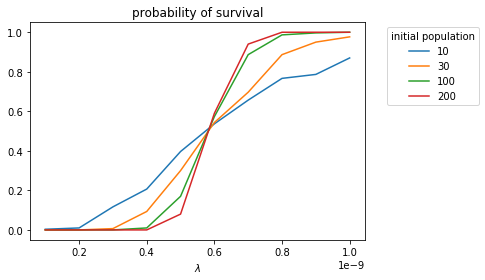

In [62]:
%%time

lam_mat     = np.arange(0.0000000001, 0.0000000011, 0.0000000001) #[0.0000000001, 0.0000000003, 0.000000001]
probability = np.zeros(np.size(lam_mat)) 

pop_0 = 30
for pop_0 in [10, 30, 100, 200]:
    for i in range(np.size(lam_mat)):
        probability[i] = ext_prob(pop_0, lam_mat[i])
    #     print(probability)
    plt.plot(lam_mat, (1 - probability), label = f'{pop_0}')
    
    
plt.title("probability of survival")
plt.xlabel("$\lambda$")

# plt.savefig("survival probability geometric.png")
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'initial population')

Wall time: 34.6 s


Text(0.5, 0, '$\\lambda$')

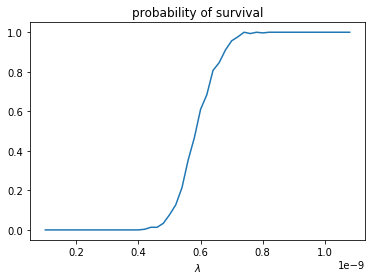

In [5]:
%%time

lam_mat     = np.arange(0.0000000001, 0.0000000011, 0.00000000002) #[0.0000000001, 0.0000000003, 0.000000001]
probability = np.zeros(np.size(lam_mat)) 

for pop_0 in [200]:
    for i in range(np.size(lam_mat)):
        probability[i] = ext_prob(pop_0, lam_mat[i])
    #     print(probability)
    plt.plot(lam_mat, (1 - probability), label = f'{pop_0}')
    
    
plt.title("probability of survival")
plt.xlabel("$\lambda$")


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00333333 0.01333333
 0.01333333 0.03333333 0.07666667 0.12666667 0.21333333 0.35333333
 0.46666667 0.61       0.68333333 0.80666667 0.84666667 0.91
 0.95666667 0.97666667 1.         0.99333333 1.         0.99666667
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ] 
 [1.e-11 2.e-11 3.e-11] 3
[0.07666667 0.12666667 0.21333333 0.35333333 0.46666667 0.61
 0.68333333 0.80666667 0.84666667 0.91       0.95666667 0.97666667
 1.         0.99333333] 
 []


ValueError: x and y must have same first dimension, but have shapes (0,) and (14,)

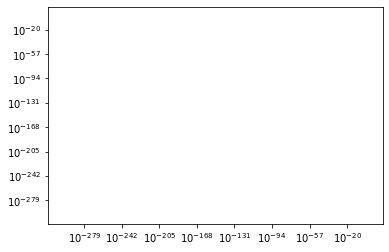

In [151]:
lam_c = 4
print(1-probability,'\n', lam_mat, np.size(lam_mat))
print(1-probability[20:34],'\n', lam_mat[20:34])
plt.loglog(abs(lam_mat[20:34]-lam_c), 1-probability[20:34])

In [18]:
fit = np.polyfit(np.log(np.abs(lam_mat[20:32] - 4.8e-10)), np.log(1-probability[20:32]), 1)
#previous calculation \beta = -4.38554695
fit

array([ 1.11995452, 24.94163464])

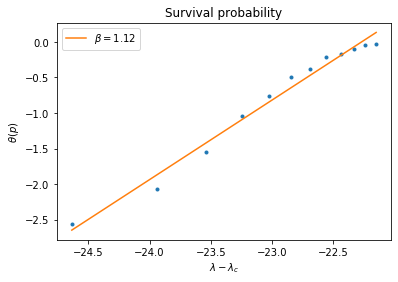

In [19]:
lam_c = 4.8e-10

plt.plot(np.log(lam_mat[20:32] - lam_c), np.log(1-probability[20:32]), '.')
plt.plot(np.log(lam_mat[20:32] - lam_c), fit[0] * np.log(lam_mat[20:32] - lam_c) + fit[1], label = f'$\u03B2={np.round(fit[0], 4)}$')

plt.title("Survival probability")
plt.ylabel("$\u03B8 (p)$")
plt.xlabel("$\lambda - \lambda_c$")

plt.legend()

# plt.savefig("1st critical exponent.png")

### Mean size
We are looking for cumulative population and it is finite for $\lambda$s which extinct and infinite for which don't for sure.


In [63]:
def final_cumulative_population(pop_0, lam):
    pop = []
    pop.append(pop_0)
    i = 0
    while int(pop[i]) > 0:
        pop.append(geometric_next_gen(int(pop[i]), lam))
        if pop[i] <=0:
            return np.sum(pop[0:i])
        i += 1
        
    return np.sum(pop[:])

In [64]:
final_cumulative_population(1, 1e-10)

-2147483647

In [77]:
geometric_next_gen(1, 4.8e-10)

-2147483648

In [95]:
geometric_next_gen(1, 4.87101e-10)

1797772019

In [73]:
np.log2(2147483648)

31.0

[-2.14748365e+09 -2.14748365e+09 -2.14748365e+09]
[-2.14748365e+09 -2.14748365e+09 -2.14748365e+09]
[-2.14748365e+09 -2.14748365e+09 -2.14748365e+09]
[-2147483647.0, -2147483647.0, -2147483647.0]
Wall time: 45.3 ms


Text(0.5, 0, '$\\lambda$')

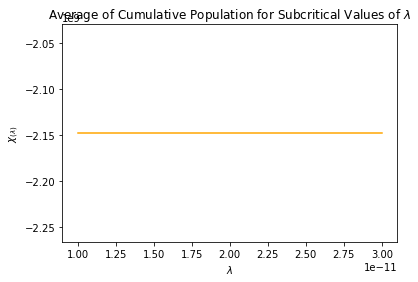

In [53]:
%%time

lam_mat = np.arange(0.1e-10, 0.4e-10, 0.1e-10)
average_cum_pop = []
 

for lam in lam_mat:
    pop_0 = 1
    ave = 3
    cum_pop = np.zeros(ave)
    for m in range(ave):
        cum_pop[m] = final_cumulative_population(pop_0, lam)
    print(cum_pop)
    average_cum_pop.append(np.mean(cum_pop[:]))
    
print(average_cum_pop)    
plt.plot(lam_mat, average_cum_pop, c = 'orange')
plt.title("Average of Cumulative Population for Subcritical Values of $\lambda$")
plt.ylabel("$\chi_{(\lambda)}$")
plt.xlabel("$\lambda$")

# plt.savefig("2nd critical exponent01.png")

In [63]:
fit2 = np.polyfit(np.log(np.abs(lam_mat - 1.0)), np.log(average_cum_pop), 1)

fit2

array([-0.98120604,  0.00913962])

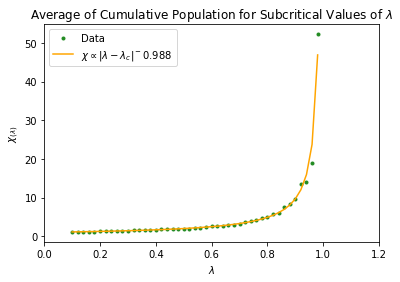

In [64]:
plt.plot(lam_mat, average_cum_pop, '.', c = 'forestgreen', label = 'Data')
plt.plot(lam_mat, np.e ** (fit2[0] * np.log(np.abs(lam_mat - 1.0)) + fit2[1]), 
         c = 'orange', label = f'$\chi \propto |\lambda - \lambda_c|^{np.round(fit[0], 3)}$')

plt.title("Average of Cumulative Population for Subcritical Values of $\lambda$")
plt.ylabel("$\chi_{(\lambda)}$")
plt.xlabel("$\lambda$")
plt.xlim(0, 1.2)
plt.legend()

plt.savefig("2nd critical exponent02.png")

### $P_k(\lambda)$ 
One can ask for the probability $P_k(\lambda)$ that the number of descendants is at least k.

In [113]:
def population(pop_0, lam, generation):
    pop = []
    survival = np.zeros(generation)
    pop.append(pop_0)
    survival[0] = 1
    for t in range(generation):
        new_pop = geometric_next_gen(int(pop[t]), lam)
        pop.append(new_pop)

        if t < generation-1 and new_pop > 0:
            survival[t+1] = 1
        else:
            break
    return survival

In [147]:
population(1, 4, 10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Wall time: 10.4 s


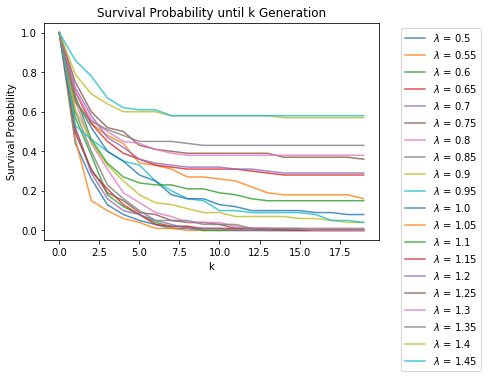

In [149]:
%%time

generation = 20
samples    = 100
pop_0      = 1


lam_mat = np.arange(0.5, 1.5, 0.05)

survival = np.zeros(generation)

for lam in lam_mat:
    survival = 0
    for s in range(samples):
        survival += population(pop_0, lam, generation)
    survival_probability = survival / samples
    plt.plot(survival_probability, alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.savefig("Survival Probability.png")

Wall time: 2min 8s


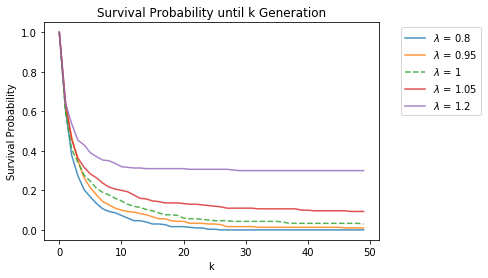

In [165]:
%%time

generation = 50
samples    = 300
pop_0      = 1


lam_mat = [0.8, 0.95, 1, 1.05, 1.2]#np.arange(0.95, 1.05, 0.01)

survival = np.zeros(generation)

for lam in lam_mat:
    survival = 0
    for s in range(samples):
        survival += population(pop_0, lam, generation)
    survival_probability = survival / samples
    if lam == 1:
        plt.plot(survival_probability, '--', alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    else:
        plt.plot(survival_probability, alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    

# plt.plot(np.arange(generation), 1/np.sqrt(np.arange(generation)+1), '--', label = 'Fit')    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.savefig("3rd critical behavior.png")

Clearly for supercritical curves it tends to a nonzero value and for subcritical ones it decays exponentially. Critical curve has a different behavoir as we expect.
$P_k(\lambda) \propto k^{-\frac{1}{\delta}}$

In [177]:

generation = 100
samples    = 1000
pop_0      = 1

survival = np.zeros(generation)
k        = np.arange(generation) + 1

lam = 1

survival = 0
for s in range(samples):
    survival += population(pop_0, lam, generation)
survival_probability = survival / samples

print(survival_probability)

fit3 = np.polyfit(np.log(k), np.log(survival_probability), 1)
fit3

[1.    0.63  0.459 0.363 0.302 0.246 0.205 0.182 0.158 0.145 0.136 0.129
 0.115 0.11  0.105 0.096 0.091 0.088 0.084 0.077 0.073 0.069 0.067 0.063
 0.062 0.059 0.056 0.055 0.051 0.051 0.051 0.05  0.046 0.046 0.045 0.045
 0.045 0.045 0.045 0.045 0.043 0.043 0.042 0.042 0.041 0.039 0.039 0.039
 0.037 0.037 0.036 0.035 0.033 0.033 0.032 0.032 0.031 0.031 0.027 0.027
 0.026 0.023 0.023 0.021 0.021 0.021 0.021 0.02  0.02  0.02  0.02  0.02
 0.02  0.02  0.02  0.02  0.019 0.019 0.018 0.018 0.018 0.018 0.017 0.017
 0.017 0.017 0.017 0.017 0.017 0.017 0.016 0.016 0.016 0.016 0.016 0.016
 0.016 0.016 0.016 0.016]


array([-0.96948346,  0.32493884])

In [178]:
delta = -1/fit3[0]
delta

1.0314771175636128

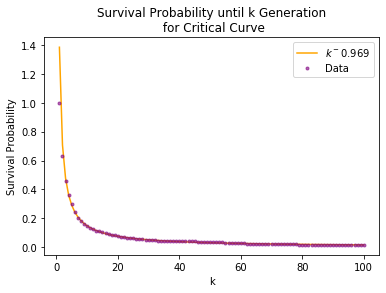

In [189]:
plt.plot(k, np.e ** (fit3[0] * np.log(k) + fit3[1]), c = 'orange', label = f'$k^{np.round(fit3[0], 3)}$' )
plt.plot(k, survival_probability, '.', c = 'purple',alpha = 0.6 , label = 'Data')

plt.title("Survival Probability until k Generation\n for Critical Curve")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.legend()

plt.savefig("Critical Curve.png")